# Text Mining Assignment

- Khatiwada Angelina
- Data Science and Economics student
- ID: 943505

Feb 2021

## Part (a): Text data pre-processing

Corpus: The SMS Spam Collection v.1, a public set of SMS labeled messages that have been collected for mobile phone spam research. It has one collection composed by 5,574 English, real and non-enconded messages, tagged according being legitimate (ham) or spam.

Source: http://www.dt.fee.unicamp.br/~tiago/smsspamcollection/

### Task 1

Importing Dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.set_option('display.max_colwidth', None)
emails = pd.read_csv('SMSSpamCollection.txt', delimiter= '\t')
emails = pd.DataFrame(emails)
emails.columns = ["class", "text"]
emails.head()
# a lot of heterogeneity in data

,class,text
0,ham,Ok lar... Joking wif u oni...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
2,ham,U dun say so early hor... U c already then say...
3,ham,"Nah I don't think he goes to usf, he lives around here though"
4,spam,"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv"


Encoding categories (ham - 1; spam - 0)

In [3]:
emails['class'] = np.where(emails['class']=='ham',1,0)
emails.head()

,class,text
0,1,Ok lar... Joking wif u oni...
1,0,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
2,1,U dun say so early hor... U c already then say...
3,1,"Nah I don't think he goes to usf, he lives around here though"
4,0,"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv"


Visualizing the most frequent terms in ham and spam using wordcloud

In [4]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def visualize(target):
    words = ''
    for msg in emails[emails['class'] == target]['text']:
        msg = msg.lower()
        words += msg + ' '
    wordcloud = WordCloud(width=1000, height=1000, random_state=1, background_color='white').generate(words)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()  

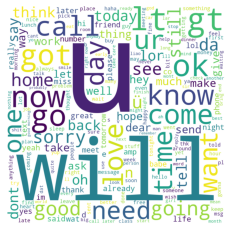

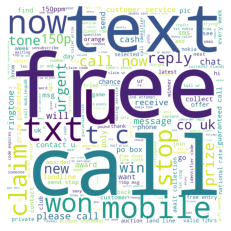

In [5]:
visualize(1) #ham
visualize(0) #spam

Downloading stopwords and punctuation disctionary from nltk

In [6]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
from nltk.corpus import stopwords 
import string
stopword = stopwords.words("english")
stopword = stopword+ list(string.punctuation)

Tokenizing corpus and eliminating punctuation and stop words

In [8]:
e_text = emails['text']

In [9]:
from nltk.tokenize import word_tokenize
result = []
for x in e_text:
    tok = [w for w in word_tokenize(x.lower())
              if w.isalpha() and w not in stopword]
    result.append(tok)
print(*result[:5], sep='\n')#printing first 5 rows

['ok', 'lar', 'joking', 'wif', 'u', 'oni']
['free', 'entry', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', 'may', 'text', 'fa', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 'c', 'apply']
['u', 'dun', 'say', 'early', 'hor', 'u', 'c', 'already', 'say']
['nah', 'think', 'goes', 'usf', 'lives', 'around', 'though']
['freemsg', 'hey', 'darling', 'week', 'word', 'back', 'like', 'fun', 'still', 'tb', 'ok', 'xxx', 'std', 'chgs', 'send', 'rcv']


Creating a list of bigrams 

In [10]:
bigrams_list =[]
for x in result:
    doc =[]
    bigrams = nltk.ngrams(x, n = 2)
    for grams in bigrams:
        doc.append(grams)
    bigrams_list.append(doc)
print(*bigrams_list[:5],sep='\n') 

[('ok', 'lar'), ('lar', 'joking'), ('joking', 'wif'), ('wif', 'u'), ('u', 'oni')]
[('free', 'entry'), ('entry', 'wkly'), ('wkly', 'comp'), ('comp', 'win'), ('win', 'fa'), ('fa', 'cup'), ('cup', 'final'), ('final', 'tkts'), ('tkts', 'may'), ('may', 'text'), ('text', 'fa'), ('fa', 'receive'), ('receive', 'entry'), ('entry', 'question'), ('question', 'std'), ('std', 'txt'), ('txt', 'rate'), ('rate', 'c'), ('c', 'apply')]
[('u', 'dun'), ('dun', 'say'), ('say', 'early'), ('early', 'hor'), ('hor', 'u'), ('u', 'c'), ('c', 'already'), ('already', 'say')]
[('nah', 'think'), ('think', 'goes'), ('goes', 'usf'), ('usf', 'lives'), ('lives', 'around'), ('around', 'though')]
[('freemsg', 'hey'), ('hey', 'darling'), ('darling', 'week'), ('week', 'word'), ('word', 'back'), ('back', 'like'), ('like', 'fun'), ('fun', 'still'), ('still', 'tb'), ('tb', 'ok'), ('ok', 'xxx'), ('xxx', 'std'), ('std', 'chgs'), ('chgs', 'send'), ('send', 'rcv')]


### Task  2

Splititng original corpus in sentences

In [11]:
sent=[]
for x in e_text:
    s = nltk.sent_tokenize(x)
    sent.append(s)
print(*sent[:5],sep='\n')

['Ok lar...', 'Joking wif u oni...']
['Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005.', "Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"]
['U dun say so early hor... U c already then say...']
["Nah I don't think he goes to usf, he lives around here though"]
["FreeMsg Hey there darling it's been 3 week's now and no word back!", "I'd like some fun you up for it still?", 'Tb ok!', 'XxX std chgs to send, £1.50 to rcv']


Vectorizing **cleaned corpus** from task 1 with a bag-of words (unigrams)

In [12]:
#transforming corpus to series
text =[]
for x in result:
    xtostr = ' '.join(map(str, x))
    text.append(xtostr)
text = pd.Series(text)

In [13]:
from sklearn.feature_extraction.text import CountVectorizer 
vec = CountVectorizer()
X1 = vec.fit_transform(text)
df = pd.DataFrame(X1.toarray(), columns=vec.get_feature_names())
df = df.transpose()
df.head()

,0,1,2,3,4,5,6,7,8,9,...,5561,5562,5563,5564,5565,5566,5567,5568,5569,5570
aa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aah,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaniye,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaooooright,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aathi,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
print(df.shape) #number of features (terms) and documents

(7195, 5571)


Vectorizing **cleaned corpus** from task 1 with a bag-of words (unigrams and bigrams)

In [15]:
vec2 = CountVectorizer(analyzer='word', ngram_range=(1, 2))
X2 = vec2.fit_transform(text)
df2 = pd.DataFrame(X2.toarray(), columns=vec2.get_feature_names())
df2 = df2.transpose()
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,5561,5562,5563,5564,5565,5566,5567,5568,5569,5570
aa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aa exhaust,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aah,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aah bless,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aah cuddle,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Vectorizing **cleaned corpus** from task 1 with TF-IDF methods

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec3 = TfidfVectorizer()
X3 = vec3.fit_transform(text)
tfidf = pd.DataFrame(X3.toarray(), columns=vec3.get_feature_names())
tfidf = tfidf.transpose()
tfidf.head()

,0,1,2,3,4,5,6,7,8,9,...,5561,5562,5563,5564,5565,5566,5567,5568,5569,5570
aa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aah,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aaniye,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aaooooright,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aathi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
print(X3[:4]) #print for the first 4 elements

  (0, 4321)	0.5420590563241163
  (0, 6957)	0.42802217002637843
  (0, 3225)	0.5297301927430984
  (0, 3402)	0.4049125581115893
  (0, 4296)	0.28000132964471275
  (1, 289)	0.1896203019897564
  (1, 4974)	0.19721955593027554
  (1, 6559)	0.14007593053623113
  (1, 5917)	0.2254263280142869
  (1, 4924)	0.2011547335431004
  (1, 5027)	0.18686171276890262
  (1, 6255)	0.13784963668955105
  (1, 3783)	0.17588195656076158
  (1, 6381)	0.24676392738380085
  (1, 2196)	0.20566772340473133
  (1, 1423)	0.2254263280142869
  (1, 2079)	0.5249780079624702
  (1, 6968)	0.16596705123971575
  (1, 1212)	0.21981380524220726
  (1, 7007)	0.21294463252770984
  (1, 1953)	0.4023094670862008
  (1, 2344)	0.1293085427694372
  (2, 188)	0.3092765333905295
  (2, 2867)	0.5144993525987204
  (2, 1831)	0.37167089338446296
  (2, 5348)	0.6199014250157037
  (2, 1813)	0.3423761270061474
  (3, 6320)	0.36259436916979954
  (3, 337)	0.32063625860603523
  (3, 3546)	0.46185310287686804
  (3, 6686)	0.41141219092523446
  (3, 2531)	0.36686416606

### Task 3

Creating Pipeline for Data Cleaning and Vectorization

In [18]:
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

#Create CleanText transformer which inherits from BaseEstimator, TransformerMixin Classes
class CleanText( BaseEstimator, TransformerMixin ):
    
    def __init__( self ):
        return 
    
    def fit( self, X, y = None ):
        return self 
    
    def clean( self, x ):
        stop = stopwords.words("english")
        stop = stop + list(string.punctuation)
        words  = [w for w in word_tokenize(x.lower()) if w.isalpha() and w not in stop]
        return " ".join(words)

    def transform( self, X, y = None ):
        return X["text"].apply(self.clean)

In [19]:
from sklearn.pipeline import Pipeline

#cleaning text
pipe_cleaning = Pipeline([('clean', CleanText())])

# vectorising text
pipe_extract = Pipeline([('clean', CleanText()), ('tfidf', TfidfVectorizer())])

In [20]:
extract = pipe_extract.fit_transform(emails)
print(extract[:4]) #print for the first 4 elements

  (0, 4321)	0.5420590563241163
  (0, 6957)	0.42802217002637843
  (0, 3225)	0.5297301927430984
  (0, 3402)	0.4049125581115893
  (0, 4296)	0.28000132964471275
  (1, 289)	0.1896203019897564
  (1, 4974)	0.19721955593027554
  (1, 6559)	0.14007593053623113
  (1, 5917)	0.2254263280142869
  (1, 4924)	0.2011547335431004
  (1, 5027)	0.18686171276890262
  (1, 6255)	0.13784963668955105
  (1, 3783)	0.17588195656076158
  (1, 6381)	0.24676392738380085
  (1, 2196)	0.20566772340473133
  (1, 1423)	0.2254263280142869
  (1, 2079)	0.5249780079624702
  (1, 6968)	0.16596705123971575
  (1, 1212)	0.21981380524220726
  (1, 7007)	0.21294463252770984
  (1, 1953)	0.4023094670862008
  (1, 2344)	0.1293085427694372
  (2, 188)	0.3092765333905295
  (2, 2867)	0.5144993525987204
  (2, 1831)	0.37167089338446296
  (2, 5348)	0.6199014250157037
  (2, 1813)	0.3423761270061474
  (3, 6320)	0.36259436916979954
  (3, 337)	0.32063625860603523
  (3, 3546)	0.46185310287686804
  (3, 6686)	0.41141219092523446
  (3, 2531)	0.36686416606

In [21]:
#comparing TF-IDF sparse matrices build with and without pipeline
if (X3 - extract).nnz == 0:
    print('Sparse matrices are equal')

Sparse matrices are equal


Cleaning and Vectorizing Pipeline is built correctly

Document-term matrix is very sparse: we have 7195 features and 5571 documents. We need to apply feature reduction or feature selection to decrease the number of features

### Additional part - Feature extraction and selection

PCA does not support sparse input, we need to use **TruncatedSVD**

In [22]:
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD

def components(n, text):
    svd = TruncatedSVD(n_components = n)
    principalComponents = svd.fit_transform(text)
    return pd.DataFrame(svd.components_, columns=text.columns)

def variance_explained(n, text):
    svd = TruncatedSVD(n_components = n)
    principalComponents = svd.fit_transform(text)
    return svd.explained_variance_ratio_

Reducing number of features to 100 features

In [23]:
principalDF = components(100, tfidf)
principalDF.head()

,0,1,2,3,4,5,6,7,8,9,...,5561,5562,5563,5564,5565,5566,5567,5568,5569,5570
0,0.011516,0.006684,0.003343,0.002803,0.013114,0.004080,0.001307,0.020329,0.020558,0.009690,...,0.011081,0.008359,0.007117,0.001008,0.022440,0.026144,0.006492,0.000087,0.007219,0.000804
1,0.032601,-0.000162,0.004536,0.002721,0.022976,0.003644,0.000124,-0.011815,-0.008985,0.007290,...,0.027539,0.015358,0.005864,0.001202,-0.003346,-0.011167,0.006375,0.000084,0.002512,0.000566
2,-0.018823,0.004322,0.002936,0.005612,-0.001165,0.007376,0.001482,-0.003071,0.001558,0.010638,...,-0.012128,0.001570,0.010571,0.000540,0.007423,0.000567,0.006708,0.000146,0.007946,0.001638
3,0.008426,-0.014264,-0.005980,-0.003652,-0.008080,-0.003405,-0.001094,-0.011672,-0.020722,-0.014818,...,0.001384,-0.006032,-0.015482,-0.001816,-0.024900,-0.014995,-0.010556,-0.000252,-0.011936,-0.001730
4,-0.003745,-0.015411,0.007818,0.005678,0.000118,0.003888,-0.001538,-0.041221,-0.038561,0.017808,...,0.002054,0.013113,0.007620,0.002385,-0.021693,-0.037721,0.015965,0.000188,-0.003991,-0.000095


In [24]:
print('Variance explained by 10 first components: ' + str(variance_explained(10, df).sum()))
print('Variance explained by 100 first components: ' + str(variance_explained(100, df).sum()))
print('Variance explained by 1000 first components: ' + str(variance_explained(1000, tfidf).sum()))

Variance explained by 10 first components: 0.12458407076748562
Variance explained by 100 first components: 0.3966693169677859
Variance explained by 1000 first components: 0.7346029054681211


The interpretation of the new features with respect to the original set loses semantic meaning. The number of documents should be greater than the number of features to apply PCA or SVD (not in our case). It's better to apply **feature selection methods, for example chi2**.

In [25]:
from sklearn.feature_selection import SelectKBest, chi2
X_s = tfidf.transpose()
y_s = emails['class']
print(X_s.shape)
print(y_s.shape)
df_s = SelectKBest(chi2, k=500).fit_transform(X_s, y_s)

(5571, 7195)
(5571,)


Standartization

In [26]:
import scipy
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
scaled = scaler.fit_transform(df_s, y_s)
print(scipy.sparse.csr.csr_matrix(scaled)[:4]) #print for the first 4 elements

  (0, 280)	3.0854451468620443
  (1, 17)	9.89395346115323
  (1, 73)	14.968701342189997
  (1, 124)	18.823274288530747
  (1, 134)	52.787312482554945
  (1, 141)	11.325145273389756
  (1, 148)	2.361429812759835
  (1, 332)	11.404167153992075
  (1, 337)	7.34289484149551
  (1, 395)	22.091156110461633
  (1, 414)	2.8877216565040706
  (1, 423)	24.422402511747936
  (1, 437)	4.05671374996478
  (1, 486)	5.8538134375507225
  (1, 490)	14.862420946332795


Selecting features and standartizing with Pipeline

In [27]:
# select and scale features
pipe_select_scale = Pipeline([("select", SelectKBest(score_func = chi2, k=500)),
                              ("scale", StandardScaler(with_mean = False))])

In [28]:
select_scale = pipe_select_scale.fit_transform(X_s, y_s)
print(scipy.sparse.csr.csr_matrix(select_scale)[:4]) #print for the first 4 elements

  (0, 280)	3.0854451468620443
  (1, 17)	9.89395346115323
  (1, 73)	14.968701342189997
  (1, 124)	18.823274288530747
  (1, 134)	52.787312482554945
  (1, 141)	11.325145273389756
  (1, 148)	2.361429812759835
  (1, 332)	11.404167153992075
  (1, 337)	7.34289484149551
  (1, 395)	22.091156110461633
  (1, 414)	2.8877216565040706
  (1, 423)	24.422402511747936
  (1, 437)	4.05671374996478
  (1, 486)	5.8538134375507225
  (1, 490)	14.862420946332795


In [29]:
#comparing standartized feature selection matrices build with and without pipeline
if (scipy.sparse.csr.csr_matrix(scaled) - scipy.sparse.csr.csr_matrix(select_scale)).nnz == 0:
    print('Sparse matrices are equal')

Sparse matrices are equal


Pipeline for cleaning, vectorizing text, extracting features and standartizing was implemented correctly.

## Part (b): (Classication and clustering, topic model and summarisation)

Pipelines for data processing

In [30]:
pipe_extract = Pipeline([('clean', CleanText()), ('tfidf', TfidfVectorizer())]) #using unigrams

In [31]:
pipe_select_scale = Pipeline([("select", SelectKBest(score_func = chi2)),
                              ("scale", StandardScaler(with_mean = False))])

In [32]:
# using only unigrams
pipe = Pipeline([('clean', CleanText()),
                 ('tfidf', TfidfVectorizer()),
                 ("select", SelectKBest(score_func = chi2)),
                 ("scale", StandardScaler(with_mean = False))])

In [33]:
# using unigrams and bigrams
pipe2 = Pipeline([('clean', CleanText()),
                 ('tfidf', TfidfVectorizer(ngram_range =[1,2])),
                 ("select", SelectKBest(score_func = chi2)),
                 ("scale", StandardScaler(with_mean = False))])

### Task 1 - Classification

In [34]:
# split data into training and test
from sklearn.model_selection import train_test_split
X = emails[['text']]
y = emails['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Logistic Model

Applying Logistic Regression Model using pipe (unigrams)

In [35]:
from sklearn.linear_model import LogisticRegression
pipe_logistic = Pipeline([('pre_process', pipe),
                          ('classify', LogisticRegression(max_iter=10000, tol=0.1, solver='lbfgs'))])

In [36]:
pipe_logistic.fit(X_train, y_train)
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
y_pred = pipe_logistic.predict(X_test)
print("f1 score: " + str(f1_score(y_test, y_pred)))
print("accuracy score: " + str(accuracy_score(y_test, y_pred)))

f1 score: 0.959778937672705
accuracy score: 0.9287656334964655


In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits=5))

              precision    recall  f1-score   support

           0    0.84302   0.58233   0.68884       249
           1    0.93761   0.98302   0.95978      1590

    accuracy                        0.92877      1839
   macro avg    0.89032   0.78267   0.82431      1839
weighted avg    0.92481   0.92877   0.92309      1839



Applying Logistic Regression Model using pipe2 (unigrams and bigrams)

In [38]:
from sklearn.linear_model import LogisticRegression
pipe_logistic2 = Pipeline([('pre_process', pipe2),
                          ('classify', LogisticRegression(max_iter=10000, tol=0.1, solver='lbfgs'))])

In [39]:
pipe_logistic2.fit(X_train, y_train)
y_pred = pipe_logistic2.predict(X_test)
f1_score_log = f1_score(y_test, y_pred)
accuracy_score_log = accuracy_score(y_test, y_pred)
print("f1 score: " + str(f1_score(y_test, y_pred)))
print("accuracy score: " + str(accuracy_score(y_test, y_pred)))

f1 score: 0.9591584158415842
accuracy score: 0.9282218597063622


In [40]:
print(classification_report(y_test, y_pred, digits=5))

              precision    recall  f1-score   support

           0    0.79695   0.63052   0.70404       249
           1    0.94397   0.97484   0.95916      1590

    accuracy                        0.92822      1839
   macro avg    0.87046   0.80268   0.83160      1839
weighted avg    0.92406   0.92822   0.92461      1839



Model using bigrams and unigrams showed a bit worse performance, so in the following classification tasks we will use only models with unigrams.

**Finding best parameters using GridSearchCV** 

Accuracy measures all the correctly identified cases. It is most used when all the classes are equally important.
F1-score is the harmonic mean of Precision and Recall, gives a better measure of the incorrectly classified cases than the Accuracy and  penalizes the extreme values.

Accuracy is used when the True Positives and True negatives are more important while F1-score is used when the False Negatives and False Positives are crucial.

We have imbalanced class distribution in our classification problem (ham/spam), therefore **F1-score is a better metric**.

In [41]:
X_extract = pipe_extract.fit_transform(X_train, y_train)

In [42]:
from sklearn.model_selection import GridSearchCV

pipe_logistic = Pipeline([('select_scale', pipe_select_scale),
                          ('classify', LogisticRegression(max_iter=10000, tol=0.1))])
param_logistic = {
    'classify__C': np.logspace(-4, 4, 3),
    'classify__solver': ['lbfgs', 'liblinear'],
    'select_scale__select__k': [100, 500, 1000, 2500, 5000],
}

cv_logistic = GridSearchCV(pipe_logistic, param_logistic, cv=10, scoring='f1') #10 folds for CV, optimize f1-score
cv_logistic.fit(X_extract, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('select_scale',
                                        Pipeline(steps=[('select',
                                                         SelectKBest(score_func=<function chi2 at 0x000002F5898078B0>)),
                                                        ('scale',
                                                         StandardScaler(with_mean=False))])),
                                       ('classify',
                                        LogisticRegression(max_iter=10000,
                                                           tol=0.1))]),
             param_grid={'classify__C': array([1.e-04, 1.e+00, 1.e+04]),
                         'classify__solver': ['lbfgs', 'liblinear'],
                         'select_scale__select__k': [100, 500, 1000, 2500,
                                                     5000]},
             scoring='f1')

In [43]:
print(cv_logistic.best_params_)
print(cv_logistic.best_score_)

{'classify__C': 1.0, 'classify__solver': 'lbfgs', 'select_scale__select__k': 5000}
0.9824586620970284


Entire logistic regression pipeline

In [44]:
log_model = Pipeline([("extract", pipe_extract),
                 ("select", SelectKBest(score_func = chi2, k = 5000)),
                 ("scale", StandardScaler(with_mean = False)),
                 ("classify", LogisticRegression(C = 1,max_iter=10000, tol=0.1, solver='lbfgs'))]) 

log_model.fit(X_train, y_train)

y_pred = log_model.predict(X_test)
f1_score_log = f1_score(y_test, y_pred)
accuracy_score_log = accuracy_score(y_test, y_pred)
print("f1 score: " + str(f1_score_log))
print("accuracy score: " + str(accuracy_score_log))

f1 score: 0.9881175734834272
accuracy score: 0.9793365959760739


In [45]:
print(classification_report(y_test, y_pred, digits=5))

              precision    recall  f1-score   support

           0    0.95671   0.88755   0.92083       249
           1    0.98259   0.99371   0.98812      1590

    accuracy                        0.97934      1839
   macro avg    0.96965   0.94063   0.95448      1839
weighted avg    0.97908   0.97934   0.97901      1839



Logistic Regression: F1 score and accuracy have improved with parameter tuning from 0.95978 to  0.98812 and from 0.92822 to 0.97934 respectively.

In [46]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

#Plotting ROC curve

def roc_plot(model, lab):
    roc_auc = roc_auc_score(y_test, model.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    plt.figure()
    plt.title('Receiver operating characteristic')
    plt.plot(fpr, tpr, label= lab +' (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()

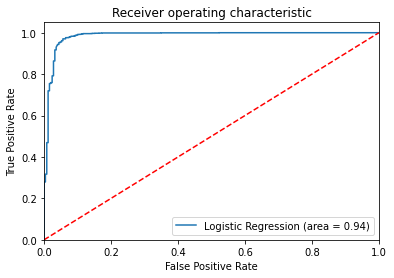

In [47]:
roc_plot(log_model, 'Logistic Regression')

Trying to classify new messages (1 - ham; 0 - spam)

In [48]:
msg = pd.DataFrame(columns = ["text"],
                   data    = [" Call 03652945 and win a Christmas gift! You can get it immediately!"])
                   
log_model.predict(msg)

array([0])

In [49]:
msg = pd.DataFrame(columns = ["text"],
                   data    = ['Hi! How are you?'])

log_model.predict(msg)

array([1])

Messages are classified correctly.

### Naive Bayes classifier

In [50]:
from sklearn.naive_bayes import MultinomialNB

pipe_nb = Pipeline([('select_scale', pipe_select_scale),
                    ('classify', MultinomialNB())])

param_nb = {
    'classify__alpha': [0.5, 1, 10],
    'select_scale__select__k': [100, 500, 1000, 2500, 5000]
}

cv_nb = GridSearchCV(pipe_nb, param_nb, cv=10, scoring='f1')
cv_nb.fit(X_extract, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('select_scale',
                                        Pipeline(steps=[('select',
                                                         SelectKBest(score_func=<function chi2 at 0x000002F5898078B0>)),
                                                        ('scale',
                                                         StandardScaler(with_mean=False))])),
                                       ('classify', MultinomialNB())]),
             param_grid={'classify__alpha': [0.5, 1, 10],
                         'select_scale__select__k': [100, 500, 1000, 2500,
                                                     5000]},
             scoring='f1')

In [51]:
print(cv_nb.best_params_)
print(cv_nb.best_score_)

{'classify__alpha': 10, 'select_scale__select__k': 500}
0.969167076826376


Entire NB pipeline

In [52]:
nb_model = Pipeline([("extract", pipe_extract),
                 ("select", SelectKBest(score_func = chi2, k = 500)),
                 ("scale", StandardScaler(with_mean = False)),
                 ("classify", MultinomialNB(alpha = 10))]) 

nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)
f1_score_nb = f1_score(y_test, y_pred)
accuracy_score_nb = accuracy_score(y_test, y_pred)
print("f1 score: " + str(f1_score_nb))
print("accuracy score: " + str(accuracy_score_nb))

f1 score: 0.9648337595907928
accuracy score: 0.9401848830886351


In [53]:
print(classification_report(y_test, y_pred, digits=5))

              precision    recall  f1-score   support

           0    0.73090   0.88353   0.80000       249
           1    0.98114   0.94906   0.96483      1590

    accuracy                        0.94018      1839
   macro avg    0.85602   0.91630   0.88242      1839
weighted avg    0.94726   0.94018   0.94252      1839



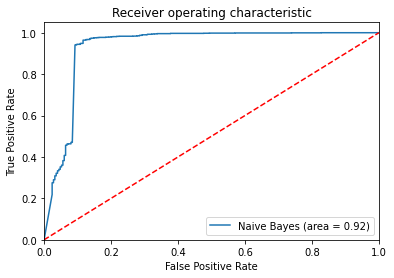

In [54]:
roc_plot(nb_model, 'Naive Bayes')

In [55]:
msg = pd.DataFrame(columns = ["text"],
                   data    = [" Call 03652945 and win a Christmas gift for free! You can get it immediately!"])
                   
nb_model.predict(msg)

array([0])

In [56]:
msg = pd.DataFrame(columns = ["text"],
                   data    = ['Hi! How are you?'])

nb_model.predict(msg)

array([1])

Messages are classified correctly

### Support Vector Machine

In [57]:
from sklearn.svm import LinearSVC

pipe_svc = Pipeline([('select_scale', pipe_select_scale),
                     ('classify', LinearSVC(max_iter=10000, tol=0.1))])

param_svc = {
    'classify__C': [0.01, 0.1, 1],
    'select_scale__select__k': [100, 500, 1000, 2500, 5000]
}

cv_svc = GridSearchCV(pipe_svc, param_svc, cv=10, scoring='f1')
cv_svc.fit(X_extract, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('select_scale',
                                        Pipeline(steps=[('select',
                                                         SelectKBest(score_func=<function chi2 at 0x000002F5898078B0>)),
                                                        ('scale',
                                                         StandardScaler(with_mean=False))])),
                                       ('classify',
                                        LinearSVC(max_iter=10000, tol=0.1))]),
             param_grid={'classify__C': [0.01, 0.1, 1],
                         'select_scale__select__k': [100, 500, 1000, 2500,
                                                     5000]},
             scoring='f1')

In [58]:
print(cv_svc.best_params_)
print(cv_svc.best_score_)

{'classify__C': 0.1, 'select_scale__select__k': 5000}
0.9805969668820671


In [59]:
svc_model = Pipeline([("extract", pipe_extract),
                 ("select", SelectKBest(score_func = chi2, k = 5000)),
                 ("scale", StandardScaler(with_mean = False)),
                 ("classify", LinearSVC(C = 0.1, max_iter=10000, tol=0.1))]) 

svc_model.fit(X_train, y_train)

y_pred = svc_model.predict(X_test)
f1_score_svc = f1_score(y_test, y_pred)
accuracy_score_svc = accuracy_score(y_test, y_pred)
print("f1 score: " + str(f1_score_svc))
print("accuracy score: " + str(accuracy_score_svc))

f1 score: 0.9824451410658307
accuracy score: 0.9695486677542142


In [60]:
print(classification_report(y_test, y_pred, digits=5))

              precision    recall  f1-score   support

           0    0.90377   0.86747   0.88525       249
           1    0.97937   0.98553   0.98245      1590

    accuracy                        0.96955      1839
   macro avg    0.94157   0.92650   0.93385      1839
weighted avg    0.96914   0.96955   0.96928      1839



In [61]:
msg = pd.DataFrame(columns = ["text"],
                   data    = [" Call 03652945 and win a Christmas gift for free! You can get it immediately!"])
                   
svc_model.predict(msg)

array([0])

In [62]:
msg = pd.DataFrame(columns = ["text"],
                   data    = ['Hi! How are you?'])

nb_model.predict(msg)

array([1])

Messages are classified correctly

### Perceptron

In [63]:
from sklearn.linear_model import Perceptron

pipe_per = Pipeline([('select_scale', pipe_select_scale),
                     ('classify', Perceptron(tol=1e-3, max_iter=1000, random_state=0))])

param_per = {
    'classify__eta0': [0.0001, 0.001, 0.01, 0.1, 1.0],
    'classify__alpha': [0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03],
    'select_scale__select__k': [100, 500, 1000, 2500, 5000]
}

cv_per = GridSearchCV(pipe_per, param_per, cv=10, scoring='f1')
cv_per.fit(X_extract, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('select_scale',
                                        Pipeline(steps=[('select',
                                                         SelectKBest(score_func=<function chi2 at 0x000002F5898078B0>)),
                                                        ('scale',
                                                         StandardScaler(with_mean=False))])),
                                       ('classify', Perceptron())]),
             param_grid={'classify__alpha': [0.0001, 0.0003, 0.001, 0.003, 0.01,
                                             0.03],
                         'classify__eta0': [0.0001, 0.001, 0.01, 0.1, 1.0],
                         'select_scale__select__k': [100, 500, 1000, 2500,
                                                     5000]},
             scoring='f1')

In [64]:
print(cv_per.best_params_)
print(cv_per.best_score_)

{'classify__alpha': 0.0001, 'classify__eta0': 0.001, 'select_scale__select__k': 500}
0.9686332100699555


In [65]:
per_model = Pipeline([("extract", pipe_extract),
                 ("select", SelectKBest(score_func = chi2, k = 500)),
                 ("scale", StandardScaler(with_mean = False)),
                 ("classify", Perceptron(alpha = 0.0001, eta0 = 0.001, tol=1e-3, max_iter=1000, random_state=0))]) 

per_model.fit(X_train, y_train)

y_pred = per_model.predict(X_test)
f1_score_per = f1_score(y_test, y_pred)
accuracy_score_per = accuracy_score(y_test, y_pred)
print("f1 score: " + str(f1_score_per))
print("accuracy score: " + str(accuracy_score_per))

f1 score: 0.9750710003155569
accuracy score: 0.957041870581838


In [66]:
print(classification_report(y_test, y_pred, digits=5))

              precision    recall  f1-score   support

           0    0.82692   0.86345   0.84479       249
           1    0.97847   0.97170   0.97507      1590

    accuracy                        0.95704      1839
   macro avg    0.90270   0.91758   0.90993      1839
weighted avg    0.95795   0.95704   0.95743      1839



In [67]:
msg = pd.DataFrame(columns = ["text"],
                   data    = [" Call 03652945 and win a Christmas gift for free! You can get it immediately!"])
                   
svc_model.predict(msg)

array([0])

In [68]:
msg = pd.DataFrame(columns = ["text"],
                   data    = ['Hi! How are you?'])

nb_model.predict(msg)

array([1])

Messages are classified correctly

**Comparing scores for 4 models:**

In [69]:
scores = {'f1-score': [f1_score_log, f1_score_nb, f1_score_svc, f1_score_per],
          'accuracy': [accuracy_score_log, accuracy_score_nb, accuracy_score_svc, accuracy_score_per]}

compare_scores = pd.DataFrame.from_dict(scores, orient='index',
                  columns=(['Logistic Regression', 'Naive Bayes Classifier', 'Support Vector Machine', 'Perceptron']))

compare_scores

,Logistic Regression,Naive Bayes Classifier,Support Vector Machine,Perceptron
f1-score,0.988118,0.964834,0.982445,0.975071
accuracy,0.979337,0.940185,0.969549,0.957042


Logistic Regression model performs better on the emails classification

### Task 1 - Clustering

In [70]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

In [71]:
tfidf = pipe_extract.fit_transform(emails)

Splitting emails into 2 clusters which may help to distinguish between spam and ham.

### K-means

In [72]:
kmeans = KMeans(n_clusters=2, random_state= 0, n_init =100)

In [73]:
k_means_result = list(zip(kmeans.fit_predict(tfidf), emails['text']))
print(*k_means_result[:9], sep ='\n') #print first 10 lines

(0, 'Ok lar... Joking wif u oni...')
(0, "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's")
(0, 'U dun say so early hor... U c already then say...')
(0, "Nah I don't think he goes to usf, he lives around here though")
(0, "FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv")
(0, 'Even my brother is not like to speak with me. They treat me like aids patent.')
(0, "As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune")
(1, 'WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.')
(1, 'Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with came

### Agglomerative Clustering

In [74]:
hac = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')

In [75]:
hac_result = list(zip(hac.fit_predict(tfidf.toarray()), emails['text']))
print(*hac_result[:9], sep ='\n') #print first 10 lines

(0, 'Ok lar... Joking wif u oni...')
(0, "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's")
(0, 'U dun say so early hor... U c already then say...')
(0, "Nah I don't think he goes to usf, he lives around here though")
(0, "FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv")
(0, 'Even my brother is not like to speak with me. They treat me like aids patent.')
(0, "As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune")
(0, 'WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.')
(0, 'Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with came

K-means performs better that agglomerative clustering. However, classification is much more powerful tool in terms of identifying spam/ham.

As a result of clustering, spam/ham are often assigned to the same cluster.

### Task 2 - Topic modelling

A smaller dataset is preferable because Topic Modelling with LDA requires some  computational capacity.

Dataset: 20 BBC news articles on the following 5 topics: Protests in Belarus, Covid, War in Syria, Animals, Archeology

Data scraping and pre-processing

In [76]:
from urllib import request
from bs4 import BeautifulSoup

In [77]:
def extract_text(a):
    response = request.urlopen('https://www.bbc.com/news/' + a)
    html = response.read().decode('utf8')
    raw = BeautifulSoup(html, 'html.parser').get_text()
    text = raw.replace('\n',' ')
    return text

In [78]:
l = ['world-asia-india-56206004', 'world-africa-56180161', 'world-us-canada-56221371', 'world-asia-56156234',
    'world-europe-56109750', 'world-europe-54961111', 'world-europe-54989508', 'world-europe-54953599',
    'world-europe-56222992', 'world-europe-jersey-56195939', 'uk-england-cambridgeshire-56116411', 'world-europe-isle-of-man-56111192',
    'world-asia-india-56224144', 'world-europe-55175734', 'world-europe-54353907', 'world-europe-54599913',
    'world-middle-east-56205056', 'world-middle-east-56185976', 'world-middle-east-55977964', 'world-middle-east-55887870']
articles = []
for i in l:
    text = extract_text(i)
    articles.append(text)

In [79]:
df = pd.DataFrame(articles, columns =['text'])

In [80]:
text_clean = pipe_cleaning.fit_transform(df)
vec = TfidfVectorizer(ngram_range=(1,2)) #use unigrams and bigrams
features = vec.fit_transform(text_clean)
print(features.shape)
vocabulary=np.array(vec.get_feature_names())

(20, 10172)


In [81]:
vocabulary

array(['abandon', 'abandon animals', 'abandoned', ..., 'zone houses',
       'zoos', 'zoos permanent'], dtype='<U142')

**Method 1**: Topic modelling using scikit-learn LDA

In [82]:
# Chose 5 topics 
from sklearn.decomposition import LatentDirichletAllocation
topic_number = 5
lda_model=LatentDirichletAllocation(n_components=topic_number,
                                    max_iter=500,
                                    max_doc_update_iter=50,
                                    learning_method='online',
                                    learning_offset=50,
                                    random_state=42)

In [83]:
document_topics=lda_model.fit_transform(features)

In [84]:
document_topics.shape

(20, 5)

In [85]:
# Extracting the most important 15 terms for each topic
topic_terms=lda_model.components_
top_terms=15 
topic_key_terms_idxs=np.argsort(-np.absolute(topic_terms), axis=1)[:,:top_terms]
topic_keyterms=vocabulary[topic_key_terms_idxs]
topics=[', '.join(topic) for topic in topic_keyterms]
pd.set_option('display.max_colwidth',-1)
topics_df=pd.DataFrame(topics,columns=['Term per Topic'], index=['Topic'+str(t) for t in range(1,topic_number+1)])
topics_df

<ipython-input-85-1f0a5d649887>:7: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth',-1)


,Term per Topic
Topic1,"wild, syria, boar, korea, animals, people, palmyra, bbc, killed, palace, syrian, new, cases, iraq, wild animals"
Topic2,"jersey, bronze age, strike, bronze, us, age, iraqi, spearhead, wood, biden, said, kataib, hezbollah, pentagon said, iran"
Topic3,"carriages, bill, man, animal, vaccine, bbc, chariot, vaccines, palace, doses, covax, viking, said, news, owner"
Topic4,"policycookiesaccessibility helpparental, songs, back, get first, ok, tariffs single, single, news alertscontact, older people, suspends, today, twitter, security, know, agency"
Topic5,"belarus, protesters, police, election, lukashenko, children, brutality, opposition, people, streets, minsk, november, august, presidential, bbc"


In [86]:
# Max probability among the terms for each topic
dt_df=pd.DataFrame(document_topics,columns=['T'+str(i) for i in range(1,topic_number+1)])
pd.options.display.float_format='{:,.5f}'.format
pd.set_option('display.max_colwidth',200)
max_contrib_topics=dt_df.max(axis=0)
dominant_topics=max_contrib_topics.index
contrib_perc=max_contrib_topics.values
document_numbers=[dt_df[dt_df[t]==max_contrib_topics.loc[t]].index[0] for t in dominant_topics]
results_df=pd.DataFrame({'Dominant Topic':dominant_topics,'Contribution%':contrib_perc, 'Answer Num': document_numbers,'Topic':topics_df['Term per Topic']})
results_df

,Dominant Topic,Contribution%,Answer Num,Topic
Topic1,T1,0.97371,0,"wild, syria, boar, korea, animals, people, palmyra, bbc, killed, palace, syrian, new, cases, iraq, wild animals"
Topic2,T2,0.96875,16,"jersey, bronze age, strike, bronze, us, age, iraqi, spearhead, wood, biden, said, kataib, hezbollah, pentagon said, iran"
Topic3,T3,0.96848,1,"carriages, bill, man, animal, vaccine, bbc, chariot, vaccines, palace, doses, covax, viking, said, news, owner"
Topic4,T4,0.01033,13,"policycookiesaccessibility helpparental, songs, back, get first, ok, tariffs single, single, news alertscontact, older people, suspends, today, twitter, security, know, agency"
Topic5,T5,0.97545,5,"belarus, protesters, police, election, lukashenko, children, brutality, opposition, people, streets, minsk, november, august, presidential, bbc"


We can analyze the keywords and see that:

- Overall, topics covered are related to Covid; Archeology; Protests in Belarus; Animals (assignment of keywords to each specific topic depends on the random state and may be different in different runs).
- Max probability among the terms for each (or almost each) topic is high

**Method 2**: Topic modelling using gensim Dictionary, LDA and pyLDAvis

In [87]:
# Create corpus with unigrams
texts = []
for x in df['text']:
    tok = [w for w in word_tokenize(x.lower())
              if w.isalpha() and w not in stopword]
    texts.append(tok)

In [88]:
import gensim
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(texts)

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [89]:
id_w = [[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]
print(id_w)

[[('abortion', 1), ('absence', 1), ('abut', 1), ('accents', 1), ('accounthomenewssportreelworklifetravelfutureculturemenumoresearchhomenewssportreelworklifetravelfutureculturemusictvweathersoundsclose', 1), ('accuses', 2), ('adds', 2), ('advises', 1), ('afford', 1), ('africa', 1), ('agofeatureswhy', 1), ('agosharecloseshare', 1), ('agotight', 1), ('agrees', 1), ('ahead', 1), ('alertscontact', 1), ('alleged', 2), ('allow', 1), ('almost', 1), ('also', 4), ('amazonian', 1), ('amid', 2), ('amravati', 4), ('analysis', 1), ('anil', 1), ('another', 2), ('antibodies', 1), ('approach', 1), ('areas', 2), ('around', 1), ('artist', 1), ('artshealthmoreworld', 1), ('asks', 2), ('attending', 1), ('attribute', 2), ('away', 1), ('back', 1), ('bad', 2), ('baffled', 1), ('bangaloredr', 1), ('battle', 2), ('battling', 1), ('bbc', 5), ('bbcadvertise', 1), ('bbcget', 1), ('bbclyrics', 1), ('bbcprivacy', 1), ('become', 1), ('beginning', 1), ('behave', 1), ('believers', 1), ('bengal', 1), ('big', 1), ('biswa

In [90]:
# Build LDA model with gensim
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5,
                                           update_every=1,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True,
                                           random_state = 42)

In [91]:
#print 10 keywords for each topics 

topics = lda_model.print_topics(num_words=10)
for topic in topics:
    print(topic)

(0, '0.008*"us" + 0.007*"people" + 0.007*"said" + 0.007*"bbc" + 0.006*"palace" + 0.006*"news" + 0.006*"new" + 0.005*"police" + 0.005*"hours" + 0.005*"get"')
(1, '0.000*"people" + 0.000*"news" + 0.000*"bbc" + 0.000*"said" + 0.000*"hours" + 0.000*"new" + 0.000*"get" + 0.000*"us" + 0.000*"security" + 0.000*"palace"')
(2, '0.008*"bbc" + 0.008*"people" + 0.007*"palace" + 0.007*"news" + 0.007*"said" + 0.006*"new" + 0.006*"hours" + 0.005*"security" + 0.004*"us" + 0.004*"belarus"')
(3, '0.013*"vaccine" + 0.011*"countries" + 0.011*"vaccines" + 0.009*"doses" + 0.009*"covax" + 0.007*"first" + 0.006*"ghana" + 0.006*"scheme" + 0.005*"people" + 0.005*"health"')
(4, '0.007*"bbc" + 0.005*"news" + 0.005*"chariot" + 0.005*"said" + 0.005*"palace" + 0.005*"found" + 0.004*"new" + 0.004*"could" + 0.004*"used" + 0.004*"us"')


We can analyze the keywords and see that:

- Overall, topics covered are related to Covid; Archeology; Protests in Belarus; Animals (assignment of keywords to each specific topic depends on the random state and may be different in different runs).

In [92]:
# Visualize the topics

import pyLDAvis
import pyLDAvis.gensim 
import matplotlib.pyplot as plt
%matplotlib inline

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=             x        y  topics  cluster     Freq
topic                                            
0      0.04384  0.03451       1        1 54.76695
2      0.11194  0.01612       2        1 28.76902
4     -0.00368 -0.09708       3        1  9.52678
3     -0.07805  0.05857       4        1  6.93488
1     -0.07405 -0.01212       5        1  0.00238, topic_info=          Term     Freq    Total Category  logprob  loglift
522    vaccine 17.00000 17.00000  Default 30.00000 30.00000
103  countries 13.00000 13.00000  Default 29.00000 29.00000
171      first 34.00000 34.00000  Default 28.00000 28.00000
42         bbc 79.00000 79.00000  Default 27.00000 27.00000
816   vaccines  9.00000  9.00000  Default 26.00000 26.00000
..         ...      ...      ...      ...      ...      ...
171      first  0.00010 34.11172   Topic5 -7.89040 -2.10080
103  countries  0.00009 13.24311   Topic5 -7.93790 -1.20220
335     palace  0.00010 67.50697   Topic5 -7.85660 -2.74960
328         ok  0.00010 34.02434   Topic5 -7.89070 -2.09860
5      accuses  0.00010 34.03060   Topic5 -7.89110 -2.09920

[361 rows x 6 columns], token_table=      Topic    Freq     Term
term                        
2109      2 0.76472     able
5         1 0.52894  accuses
5         2 0.35262  accuses
5         3 0.08816  accuses
5         4 0.02939  accuses
...     ...     ...      ...
552       2 0.27438    would
552       4 0.13719    would
1467      1 0.28274    years
1467      2 0.65972    years
1467      3 0.09425    years

[443 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 5, 4, 2])

### Task 3 - Text Summarization

We will use gensim summarization and gensim Word2Vec embeddings and PageRank to summarize an article about Protests in Belarus

Article: https://www.bbc.com/news/world-europe-54961111

In [93]:
import gensim
from gensim.summarization.summarizer import summarize
from gensim.summarization import keywords
import re
from nltk.tokenize import sent_tokenize
from gensim.models import Word2Vec
from scipy import spatial
import networkx as nx

In [94]:
article = extract_text('world-europe-54961111')

**Method 1:** Applying gensim summarize function: summary is satisfactory and may be improved.

In [95]:
print(summarize(article, word_count=100))

Belarus protesters battered, bruised but defiant after 100 days - BBC NewsBBC HomepageSkip to contentAccessibility HelpBBC AccountHomeNewsSportReelWorklifeTravelFutureCultureMenuMoreSearchHomeNewsSportReelWorklifeTravelFutureCultureMusicTVWeatherSoundsClose menuBBC NewsMenuHomeCoronavirusVideoWorldUKBusinessTechScienceStoriesEntertainment & ArtsHealthMoreWorld News TVIn PicturesReality CheckNewsbeatLong ReadsWorldAfricaAsiaAustraliaEuropeLatin AmericaMiddle EastUS & CanadaBelarus protesters battered, bruised but defiant after 100 daysBy Abdujalil AbdurasulovBBC NewsPublished17 November 2020SharecloseShare pageCopy linkAbout sharingRelated TopicsBelarusian presidential election 2020media captionHundreds were arrested at the protest in Minsk on 15 NovemberOpposition protesters remain defiant in Belarus despite police brutality, 100 days after they first took to the streets to denounce the re-election of President Alexander Lukashenko.Police in helmets and body armour throw women holding 

In [96]:
print('Keywords:')
print(keywords(article))

Keywords:
police
news
people
protest
new elections
opposition protests
belarus protesters
women
hours
image
august
bbc
officers
days
day
presidential election
march
marches
old
said
videothe
november
prisoners
prison
rallies
rally
activist
activists
security
lukashenko
accuses palace
pogerilo says
fishermen
media
took
leader
leaders
vladimir
slaps
streets
street
accents
personalised
future
block
try
sustainable
stop
girl
turned
displays
turn
believers
law
minsk
quickly
chase
artist
festive
regularly
stun
demonstrations
demonstrators
demonstrating
hit
started hitting
start
helpparental
asks alleged
external
sites
world
policycookiesaccessibility
leadership style
like
flags
andrey
diana
widely
wide
copyrightgetty
singing
sing
remain
remains
remained
falsehoods
distress injures
exits
okrestina
brutality
attacked
attack
flash


**Method 2:** Applying gensim sentence embeddings to improve summary

In [97]:
#pre-processing the sentences
sentences=nltk.sent_tokenize(article)
sentences_clean=[re.sub(r'[^\w\s]','',sentence.lower()) for sentence in sentences]
stop_words = stopwords.words('english')
sentence_tokens=[[words for words in sentence.split(' ') if words not in stop_words] for sentence in sentences_clean]

In [98]:
#applying sentence_embeddings
w2v=Word2Vec(sentence_tokens,size=1,min_count=1,iter=1000)
sentence_embeddings=[[w2v[word][0] for word in words] for words in sentence_tokens]
max_len=max([len(tokens) for tokens in sentence_tokens])

<ipython-input-98-37689534effe>:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  sentence_embeddings=[[w2v[word][0] for word in words] for words in sentence_tokens]
<ipython-input-98-37689534effe>:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  sentence_embeddings=[[w2v[word][0] for word in words] for words in sentence_tokens]
<ipython-input-98-37689534effe>:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  sentence_embeddings=[[w2v[word][0] for word in words] for words in sentence_tokens]
<ipython-input-98-37689534effe>:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  sentence_embeddings=[[w2v[word][0] for word in words] for words in sentence_tokens]
<ipython-input-98-376895

In [99]:
sentence_embeddings=[np.pad(embedding,(0,max_len-len(embedding)),'constant') for embedding in sentence_embeddings]

In [100]:
#constructing similarity matrix for words 
similarity_matrix = np.zeros([len(sentence_tokens), len(sentence_tokens)])
for i,row_embedding in enumerate(sentence_embeddings):
    for j,column_embedding in enumerate(sentence_embeddings):
        similarity_matrix[i][j]=1-spatial.distance.cosine(row_embedding,column_embedding)

In [101]:
#building a graph and calculating pagerank 
nx_graph = nx.from_numpy_array(similarity_matrix)
scores = nx.pagerank(nx_graph)

In [102]:
#retrieving top 10 sentences
top_sentence={sentence:scores[index] for index,sentence in enumerate(sentences)}
top=dict(sorted(top_sentence.items(), key=lambda x: x[1], reverse=True)[:10])

In [103]:
for sent in sentences:
    if sent in top.keys():
        print(sent)

Officers tear-gas elderly people on a pensioners' march.
Initially this people's tsunami made the police disappear from the streets.
Women screamed and raised their hands, begging the police not to take them.
"There are fewer opposition flags," said Vladimir (not his real name), an entrepreneur in Minsk.
They include Andrey Pogerilo, a 29-year-old locksmith from Grodno.
He was in a cafe when the first clashes took place in Minsk that night.
That day police wanted to break people, not detain them."
Prominent athletes openly demand new elections and an end to police violence.
Their response to beatings is to turn up at the next rally carrying flowers.
The past 100 days have illustrated how powerful this peaceful approach is.


Second method shows better results. Summary covers the entire text and conveys the main idea of the article.